In [1]:
import numpy as np
import mdtraj as md
import matplotlib.pyplot as plt
import nglview as nv
import seaborn as sns


# # # Path: pymdna/__init__.py, prototype of the package and atomic is not properly referenced in the package at genertors.py now I just explicitly define the path loction
# # import pymdna as mdna
import sys
sys.path.append('/Users/thor/surfdrive/Projects/pymdna/')
import pymdna as mdna 
%load_ext autoreload
%autoreload 2

/Users/thor/surfdrive/Projects/PMCpy/pmcpy/Evals/PyLk/pylk/writhemap.py:16: UserWarning: Cython version of writhemap (PyLk) not compiled. Defaulting to numba implementation. Consider compiling the cython version.
  warnings.warn(
/Users/thor/surfdrive/Projects/PMCpy/pmcpy/Evals/PyLk/pylk/eval_link.py:10: UserWarning: Cython version of linkingnumber (PyLk) not compiled. Defaulting to numba implementation. Consider compiling the cython version.
  warnings.warn(


# Analyse

In [4]:
# Nucleosome Core Particle
loc = '/Users/thor/surfdrive/Projects/Nucleosome/production_run/'
traj = md.load(loc+'dry.xtc', top=loc+'dry.pdb',stride=250)
traj.center_coordinates()

# find index of residue somewhere in the middle of the nucleosome
indices = traj.top.select('resSeq 73 and chainid 7')
residx = traj.topology.atom(indices[0]).residue.index
anchor_molecules=[set(traj.topology.residue(residx).atoms)]

# put everything in the same box based on the anchor residue
traj = traj.image_molecules(anchor_molecules=anchor_molecules)

In [47]:
# H-NS
path = '/Users/thor/surfdrive/Data/h-ns/NAR/md/0_highaff/FI/drytrajs/'
dna = mdna.load(filename=path+'dry_0.xtc',top=path+'dry_0.pdb')

dna.describe()


DNA structure with 12 base pairs
Sequence: GCAATATATTGC
Trajectory: <mdtraj.Trajectory with 1001 frames, 1588 atoms, 116 residues, and unitcells>
Frames:  (12, 1001, 4, 3)


In [38]:
mean_frames = dna.get_frames()
print(mean_frames.shape)

base_frames = dna.get_base_frames()
for res, ref in base_frames.items():
    print(res, ref.shape)
    break

(12, 1001, 4, 3)
DG1 (1001, 4, 3)


In [62]:
base, names = dna.get_parameters(base=True)
print(base.shape, names)

step, names = dna.get_parameters(step=True)
print(step.shape, names)

params, names = dna.get_parameters()
print(params.shape, names)

name = 'twist'
para = dna.get_parameter(name)
print(para.shape)

(1001, 12, 6) ['shear', 'stretch', 'stagger', 'buckle', 'propeller', 'opening']
(1001, 12, 6) ['shift', 'slide', 'rise', 'tilt', 'roll', 'twist']
(1001, 12, 12) ['shear', 'stretch', 'stagger', 'buckle', 'propeller', 'opening', 'shift', 'slide', 'rise', 'tilt', 'roll', 'twist']
(1001, 12)


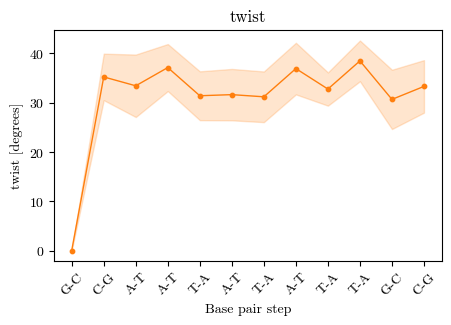

In [63]:

fig, ax = plt.subplots(figsize=[5,3])
color = 'tab:orange'
mean = np.mean(para, axis=0)
std = np.std(para, axis=0)
x = range(len(mean))

ax.fill_between(x, mean-std, mean+std, color=color, alpha=0.2)
ax.plot(mean, color=color,lw=1)    
ax.scatter(x=x,y=mean,color=color,s=10)
ax.set_title(name)
ax.set_ylabel(f'{name} [degrees]')
ax.set_xlabel('Base pair step')
ax.set_xticks(range(len(mean)))
base_map = dna.base_pair_map
anti_sequence = [base_map[c] for c in dna.sequence ]
base_pairs = [f'{i}-{j}' for i,j in zip(dna.sequence, anti_sequence)]
_ = ax.set_xticklabels(base_pairs,rotation=45)

Text(0.75, 0.85, 'Step Parameters')

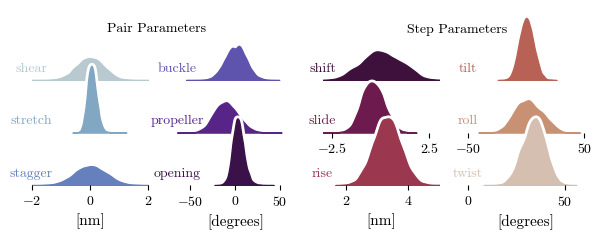

In [64]:
import matplotlib as mpl, matplotlib.font_manager as font_manager
import seaborn as sns

mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['axes.formatter.use_mathtext'] = True

colors = sns.color_palette("twilight", 12)
lims = [(-2,2),(-2,2),(-2,2),(-65,65),(-65,65),(-65,65)] + [(-3,3),(-3,3),(1.25,5),(-50,50),(-50,50),(0,60)]
fig, ax = plt.subplots(3,4, figsize=(6,2.5),sharey='col')
# ax = ax.flatten()
idx, jdx = 0, 0
for _,name in enumerate(names):
    para = params[:,1:,names.index(name)]
    sns.kdeplot(para.flatten(), ax=ax[idx][jdx],fill=True,color='white',lw=5)#, density=True)
    sns.kdeplot(para.flatten(), ax=ax[idx][jdx],fill=True,color=colors[_],alpha=1,lw=1)#, density=True)
    ax[idx][jdx].set_title(name,x=0,y=0,color=colors[_],fontsize=10)
    ax[idx][jdx].set_xlim(lims[_])

    ax[idx][jdx].set_facecolor('none')
    ax[idx][jdx].set_yticklabels([])
    ax[idx][jdx].set_yticks([])
    ax[idx][jdx].set_ylabel('')
    if name  in ['shear','buckle','shift','tilt','stretch','propeller']:
        ax[idx][jdx].set_xticks([])
    idx+=1
    if idx == 3:
        idx = 0
        jdx+=1
    if jdx == 4:
        jdx = 0

    if idx == 0 and jdx in [0,1,2,3]:
        ax[idx][jdx].set_xticklabels([])
    if idx == 1 and jdx in [0,1]:
        ax[idx][jdx].set_xticklabels([])

ax[-1][0].set_xlabel('[nm]',fontsize=11)
ax[-1][1].set_xlabel('[degrees]',fontsize=11)
ax[-1][2].set_xlabel('[nm]',fontsize=11)
ax[-1][3].set_xlabel('[degrees]',fontsize=11)
fig.tight_layout()
fig.subplots_adjust(hspace=-.25)

sns.despine(bottom=True, left=True)
fig.text(0.25, 0.85, 'Pair Parameters', ha='center',fontsize=10)
fig.text(0.75, 0.85, 'Step Parameters', ha='center',fontsize=10)

# Build

## Make DNA

In [ ]:
# Build DNA with nothing, will output DDD sequence
dna = mdna.make()
dna.describe()

In [ ]:
# Or provide a sequence
dna = mdna.make(sequence='GCGCGCGCGC')
dna.describe()

In [ ]:
# Or provide a number of basepairs, resulting in a random sequence
dna = mdna.make(n_bp=10)
dna.describe()

## Make minicircle 

In [ ]:
# Or make a minicircle DNA in circular form
dna = mdna.make(n_bp=200,circular=True)
print('Lk, Wr, Tw',dna.get_linking_number())
dna.draw()

# Lets also minimize the DNA configuration
dna.minimize()

# See the final configuration
dna.draw()

# or save the structure to a pdb file
dna.save_pdb('minimized_nbp_200_closed.pdb')

## Writhe equilibration

In [ ]:
# Also change the linking number by under or overwinding the DNA using the dLk parameter
dna = mdna.make(n_bp=200,circular=True,dLk=8)
dna.describe()
dna.get_linking_number()

# Minimize the DNA configuration, note to equilibrate the writhe use equilibrate_writhe=True, otherwise the Lk will not be conserved
dna.minimize(equilibrate_writhe=True)
dna.get_linking_number()

## Shape Library

In [ ]:
# We can also use custom shapes using the Shape class
control_points = mdna.Shapes.helix(height=3,pitch=5,radius=7, num_turns=4)
dna = mdna.make(n_bp=300,control_points=control_points)
dna.draw()

## Custom shapes

In [ ]:
# Or use the control points to define a custom shape
control_points = np.array([[0,0,0],[30,10,-10],[50,10,20],[3,4,30]])
dna = mdna.make(n_bp=100,control_points=control_points,sequence=['A']*100)
dna.draw()
dna.describe()
dna.sequence

## Extend

In [ ]:
# We can also extend our DNA 
dna.extend(sequence=['G']*120)

# Or extend it in the opposite direction
dna.extend(sequence=['C']*120,forward=False)
dna.draw()

## Connect

In [ ]:
# Lets generate two strands of DNA and displace the second one away from the first one
dna0 = mdna.make(sequence='AAAAAAAAA',control_points=mdna.Shapes.line(1))
dna1 = mdna.make(sequence='GGGGGGGGG',control_points=mdna.Shapes.line(1)+np.array([4,0,-5]))

# Now we can connect the two strands, the function will find the optimal number of basepairs to connect the two strands to minimize the twist 
dna2 = mdna.connect(dna0,dna1)
dna2.draw()
dna2.describe()

In [ ]:
view = nv.show_mdtraj(dna2.get_traj())
view

In [ ]:
# Build DNA with nothing, will output DDD sequence
dna = mdna.make()
dna.describe()


# Or provide a sequence
dna = mdna.make(sequence='GCGCGCGCGC')
dna.describe()


# Or provide a number of basepairs, resulting in a random sequence
dna = mdna.make(n_bp=10)
dna.describe()


# Or make a minicircle DNA in circular form
dna = mdna.make(n_bp=200,circular=True)
print('Lk, Wr, Tw',dna.get_linking_number())
dna.draw()

# Lets also minimize the DNA configuration
dna.minimize()

# See the final configuration
dna.draw()

# or save it to a file
dna.save('minimized_nbp_200_closed.pdb')



# Also change the linking number by under or overwinding the DNA using the dLk parameter
dna = mdna.make(n_bp=200,circular=True,dLk=8)
dna.describe()
dna.get_linking_number()

# Minimize the DNA configuration, note to equilibrate the writhe use equilibrate_writhe=True, otherwise the Lk will not be conserved
dna.minimize(equilibrate_writhe=True)
dna.get_linking_number()


### Shape library
# We can also use custom shapes using the Shape class
control_points = mdna.Shapes.helix(height=3,pitch=5,radius=7, num_turns=4)
dna = mdna.make(n_bp=300,control_points=control_points)
dna.draw()


# Or use the control points to define a custom shape
control_points = np.array([[0,0,0],[30,10,-10],[50,10,20],[3,4,30]])
dna = mdna.make(n_bp=100,control_points=control_points,sequence=['A']*100)
dna.draw()
dna.describe()
dna.sequence


# We can also extend our DNA 
dna.extend(sequence=['G']*120)

# Or extend it in the opposite direction
dna.extend(sequence=['C']*120,forward=False)
dna.draw()


# Lets generate two strands of DNA and displace the second one away from the first one
dna0 = mdna.make(sequence='AAAAAAAAA',control_points=mdna.Shapes.line(1))
dna1 = mdna.make(sequence='GGGGGGGGG',control_points=mdna.Shapes.line(1)+np.array([4,0,-5]))

# Now we can connect the two strands, the function will find the optimal number of basepairs to connect the two strands to minimize the twist 
dna2 = mdna.connect(dna0,dna1)
dna2.draw()
dna2.describe()


# visualize using nglview MC minmization
view = nv.show_mdtraj(dna2.get_MC_traj())
view

# Modify

In [ ]:
# Here we make a DNA with the following sequence
dna = mdna.make(sequence='AGCGATATAGA')

# Let's save the original structure
traj = dna.get_traj()
traj.save_pdb('dna_original.pdb')

# Let's mutate the first base to an G and the last base to a C
dna.mutate({0: 'G', dna.n_bp : 'C'},complementary=True)

# Get information about the DNA and see the mutated sequence
dna.describe()

#  use methylation list, here we methylate the 5th position, which is T, so methylation won't work but is caught by the function
dna.methylate(methylations=[5])

# or use the methylation function to methylate all CpG sites
dna.methylate(CpG=True)

# Hoogsteen flip can be done at any base pair, here we flip the 5th base pair
dna.flip(fliplist=[5],deg=180)

# Get trajectory or save as pdb
traj_mod = dna.get_traj()
traj_mod.save_pdb('dna_modified.pdb')

In [ ]:
dna = mdna.make(sequence='GCAATGCGC')

#  use methylation list
dna.methylate(methylations=[3])

# or use the methylation function
dna.methylate(CpG=True)


dna =  mdna.make(sequence='GCAAAAGC')
dna.flip(fliplist=[4],deg=180)

# End

In [ ]:

traj = dna.get_traj()
view = nv.show_mdtraj(traj)
view.clear()
view.add_representation('licorice')
view

### make minicircle

In [ ]:
dna = mdna.make(n_bp=200, circular=True)
dna.draw()

In [ ]:
dna.minimize()
dna.draw()

### minicircle with dLk

In [ ]:
dna = mdna.make(n_bp=315, dLk=10, circular=True)
dna.draw()

In [ ]:
dna.minimize(equilibrate_writhe=True)
dna.draw() 

In [ ]:
mc_traj = dna.get_MC_traj()
view = nv.show_mdtraj(mc_traj)
view

In [ ]:
dna.get_linking_number()

In [ ]:
traj = dna.get_traj()
traj.save('test.pdb')

#### extend

In [ ]:
dna = mdna.make('GGGGG')
dna.extend(sequence='AAAAA')
dna.extend(sequence='CCCCC',forward=False)

dna.draw()
dna.describe()

In [ ]:
dna.extend(n_bp=20, forward=False)
dna.draw()

### Connect



In [ ]:
dna0 = mdna.make(sequence='AAAAA',control_points=np.array([[0,0,0],[0,0,1],[0,0,2],[0,0,3],[0,0,4]]))
dna1 = mdna.make(sequence='GGGGG',control_points=np.array([[0,0,0],[0,0,1],[0,0,2],[0,0,3],[0,0,4]])-np.array([0,0,0])+np.array([0,0,20]))

dna2 = mdna.connect(dna0,dna1, n_bp=50)
dna2.draw()
dna2.describe()

In [ ]:
view = nv.show_mdtraj(dna2.get_MC_traj())
view

#### add connect

In [ ]:
dna.extend?

In [ ]:
dna0 = mdna.make(sequence='AAAAA',control_points=np.array([[0,0,0],[0,0,1],[0,0,2],[0,0,3],[0,0,4]]))
dna1 = mdna.make(sequence='GGGGG',control_points=np.array([[0,0,0],[0,0,1],[0,0,2],[0,0,3],[0,0,4]])-np.array([0,0,0])+np.array([0,0,20]))

dna2 = mdna.connect(dna0,dna1)
#dna2.minimize(exvol_rad=2)

In [ ]:
view = nv.show_mdtraj(dna2.get_MC_traj()[::1])
view

In [ ]:
dna0 = mdna.make(sequence='AAAAA',control_points=np.array([[0,0,0],[0,0,1],[0,0,2],[0,0,3],[0,0,4]]))
dna1 = mdna.make(sequence='GGGGG',control_points=np.array([[0,0,0],[0,0,1],[0,0,2],[0,0,3],[0,0,4]])-np.array([0,0,0])+np.array([20,20,0]))

dna2 = mdna.connect(dna0,dna1,n_bp=10)#sequence='AAAAAGGGGG')
#dna2.minimize(exvol_rad=0.5)
view = nv.show_mdtraj(dna2.get_MC_traj()[::50])
view

#### add extend  

In [ ]:
dna1 = mdna.make(sequence='GGGGG',control_points=np.array([[0,0,0],[0,0,1],[0,0,2],[0,0,3],[0,0,4]])-np.array([0,0,0])+np.array([0,0,20]))
dna1.draw(triads=True)

In [ ]:
dna =  mdna.make(sequence='AAAAAAA')
print(dna.describe())
# dna.extend(24,forward=True,minimize=False)
# print(dna.describe())
# dna.extend(24,forward=False,minimize=False)
# print(dna.sequence)
# #, dna.sequence, dna.describe()

In [ ]:
print(dna.describe())

In [ ]:
dna.draw(triads=True)

In [ ]:
new_dna.extend(24,forward=True)
newest_dna = new_dna.new_nuc
newest_dna.draw()   
newest_dna.n_bp

#### fix mutations

In [ ]:
dna =  mdna.make(sequence='GCATATAGC')
print(dna.sequence)
traj = dna.get_traj()
idx = 0 
for  res in traj.top._residues:
    print(idx, [at.index for at in res._atoms])
    print(idx, [at.name for at in res._atoms])
    idx+=1

In [ ]:
dna =  mdna.make(sequence='TCATATAGC')
print(dna.sequence)
traj = dna.get_traj()
idx = 0 
for  res in traj.top._residues:
    print(idx, [(at.index, at.name) for at in res._atoms])
    #print(idx, [at.name for at in res._atoms])
    if idx == 1:
        break
    idx+=1

In [ ]:
dna =  mdna.make(sequence='ATGCUDETLMBSZP')
traj = dna.get_traj()
view = nv.show_mdtraj(traj)
view.clear()
view.add_representation('ball+stick')
view

In [ ]:
dna =  mdna.make(sequence='GCC')
print(dna.sequence)
dna.mutate(mutations={2: 'P'},complementary=False)#, 1: 'T', 2: 'G'})
print(dna.sequence)
traj = dna.get_traj()
idx = 0 
for  res in traj.top._residues:
    print(idx, [(at.index, at.name) for at in res._atoms])
    #print(idx, [at.name for at in res._atoms])
    if idx == 1:
        break
    idx+=1

In [ ]:
traj = dna.get_traj()

view = nv.show_mdtraj(traj) 
view.clear()
view.add_representation('licorice')
view

In [ ]:
dna =  mdna.make(sequence='CGCGATATAGC')
print(dna.sequence)
dna.methylate(CpG=True)#=={0: 'A'})#, 1: 'T', 2: 'G'})
print(dna.sequence)
traj = dna.get_traj()
idx = 0 
for  res in traj.top._residues:
    print(idx, [at.index for at in res._atoms])
    idx+=1

In [ ]:
dna =  mdna.make(sequence='GAG')
print(dna.sequence)
dna.flip(fliplist=[1],deg=180)#=={0: 'A'})#, 1: 'T', 2: 'G'})
print(dna.sequence)
traj = dna.get_traj()
idx = 0 
for  res in traj.top._residues:
    print(idx, [at.index for at in res._atoms])
    idx+=1

In [ ]:
dna =  mdna.make(sequence='GAG')
view = nv.show_mdtraj(dna.get_traj())
view.clear()
view.add_representation('licorice')
view

In [ ]:
dna = mdna.make(n_bp=120,control_points=mdna.Shapes.circle(1),closed=True,dLk=5)
dna.minimize(equilibrate_writhe=True)

In [ ]:
dna = mdna.make(n_bp=300,control_points=mdna.Shapes.trefoil(1),closed=True,dLk=12)
dna.minimize(equilibrate_writhe=True)

In [ ]:
mc = dna.get_MC_traj()
view = nv.show_mdtraj(mc[::50])
view.clear()
view.add_representation('line', selection='all')
view

In [ ]:
dna.draw(triads=True,backbone=False)

In [ ]:
dna = mdna.make(n_bp=100)
dna.draw()

In [ ]:
shape = mdna.Shapes.circle(10)
nuc = mdna.make(control_points=shape,n_bp=315,closed=True,dLk=5)
nuc.describe()
nuc.draw()
nuc.minimize(equilibrate_writhe=True,simple=True,exvol_rad=2, temperature=300)
traj = nuc.get_traj()
traj.save('315nuc.pdb')

In [ ]:
shape = mdna.Shapes.circle(10)
nuc = mdna.make(control_points=shape,n_bp=315,closed=True,dLk=5)
nuc.describe()
nuc.minimize(equilibrate_writhe=False,simple=False,exvol_rad=2, temperature=300)
traj = nuc.get_traj()
traj.save('315nuc_expmin.pdb')

In [ ]:
nuc.draw()

In [ ]:
view = nv.show_mdtraj(traj)
view.clear()
view.add_representation('line')
view

In [ ]:
traj.save('circle_315bp_dlk5.pdb')

In [ ]:
pdb = mdna.sequence_to_pdb('CAT')

In [ ]:
traj = mdna.sequence_to_md('CAT')

In [ ]:
nuc = mdna.compute_rigid_parameters(traj)
_ = nuc.plot_parameters()
twist = nuc.get_parameter('twist')
twist.shape

In [ ]:
path  = '/Users/thor/surfdrive/Data/h-ns/BacterialChromatin/FI_simulations/0_k/8_Haff/' #0_3GC'
i =0
traj = md.load(path+f'dry_{i}_run.xtc', top=path+f'dry_{i}_run.pdb',stride=10).remove_solvent()
traj = traj.atom_slice(traj.top.select('not protein'))
traj = traj.superpose(traj,0)
traj
nuc = mdna.compute_rigid_parameters(traj)

import matplotlib as mpl, matplotlib.font_manager as font_manager
import seaborn as sns
mpl.rcParams['font.family']='serif'
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False
mpl.rcParams['axes.formatter.use_mathtext'] = True


In [ ]:
import seaborn as sns
params, names = nuc.get_parameters()

In [ ]:
colors = sns.color_palette("twilight", 12)
lims = [(-3,3),(-3,3),(-3,3),(-75,75),(-75,75),(-75,75)] + [(-4,4),(-4,4),(1.5,5),(-50,50),(-50,50),(0,60)]
fig, ax = plt.subplots(3,4, figsize=(6,3))#,sharey='row')
# ax = ax.flatten()
idx, jdx = 0, 0
for _,name in enumerate(names):
    para = params[:,1:,names.index(name)]
    sns.kdeplot(para.flatten(), ax=ax[idx][jdx],fill=True,color='white',lw=5)#, density=True)
    sns.kdeplot(para.flatten(), ax=ax[idx][jdx],fill=True,color=colors[_],alpha=1,lw=1)#, density=True)
    ax[idx][jdx].set_title(name,x=0,y=0,color=colors[_],fontsize=10)
    ax[idx][jdx].set_xlim(lims[_])


    ax[idx][jdx].set_yticklabels([])
    ax[idx][jdx].set_ylabel('')
    idx+=1
    if idx == 3:
        idx = 0
        jdx+=1
    if jdx == 4:
        jdx = 0

ax[-1][0].set_xlabel('[nm]')
ax[-1][1].set_xlabel('[degrees]')
ax[-1][2].set_xlabel('[nm]')
ax[-1][3].set_xlabel('[degrees]')
fig.tight_layout()
#fig.subplots_adjust(hspace=-0)

sns.despine(bottom=True, left=True)
fig.text(0.25, 0.95, 'Pair Paramters', ha='center',fontsize=12)
fig.text(0.75, 0.95, 'Step Paramters', ha='center',fontsize=12)
# fig.savefig('parameters.png',dpi=300,bbox_inches='tight')


In [ ]:
colors = sns.color_palette("twilight", 12)
lims = [(-2,2),(-2,2),(-2,2),(-65,65),(-65,65),(-65,65)] + [(-3,3),(-3,3),(1.25,5),(-50,50),(-50,50),(0,60)]
fig, ax = plt.subplots(3,4, figsize=(6,2.5),sharey='col')
# ax = ax.flatten()
idx, jdx = 0, 0
for _,name in enumerate(names):
    para = params[:,1:,names.index(name)]
    sns.kdeplot(para.flatten(), ax=ax[idx][jdx],fill=True,color='white',lw=5)#, density=True)
    sns.kdeplot(para.flatten(), ax=ax[idx][jdx],fill=True,color=colors[_],alpha=1,lw=1)#, density=True)
    ax[idx][jdx].set_title(name,x=0,y=0,color=colors[_],fontsize=10)
    ax[idx][jdx].set_xlim(lims[_])


    ax[idx][jdx].set_yticklabels([])
    ax[idx][jdx].set_ylabel('')
    idx+=1
    if idx == 3:
        idx = 0
        jdx+=1
    if jdx == 4:
        jdx = 0

    if idx == 0 and jdx in [0,1,2,3]:
        ax[idx][jdx].set_xticklabels([])
    if idx == 1 and jdx in [0,1]:
        ax[idx][jdx].set_xticklabels([])

ax[-1][0].set_xlabel('[nm]',fontsize=11)
ax[-1][1].set_xlabel('[degrees]',fontsize=11)
ax[-1][2].set_xlabel('[nm]',fontsize=11)
ax[-1][3].set_xlabel('[degrees]',fontsize=11)
fig.tight_layout()
fig.subplots_adjust(hspace=-.25)

sns.despine(bottom=True, left=True)
fig.text(0.25, 0.85, 'Pair Parameters', ha='center',fontsize=10)
fig.text(0.75, 0.85, 'Step Parameters', ha='center',fontsize=10)

In [ ]:
_ = nuc.plot_parameters()
twist = nuc.get_parameter('twist')
twist.shape

#### Test with mdtraj 

In [ ]:
mdna.make(sequence, control_points, nbp, closed)

In [ ]:
nuc = mdna.load(traj)
nuc.describe()
nuc.draw()#triads=False,lw=5, helical_axis=True,markersize=10)

In [ ]:
shape = mdna.Shapes.circle(10)
nuc = mdna.make(control_points=shape, n_bp=100, closed=True, dLk=5)
nuc.draw()

In [ ]:
nuc.frames.shape

In [ ]:
shape = mdna.Shapes.circle(10)
nuc = mdna.make(control_points=shape,n_bp=315,closed=True,dLk=5)
nuc.draw()
nuc.minimize(equilibrate_writhe=False,simple=False,exvol_rad=0.0, temp=300)
nuc.draw()

In [ ]:
nuc.draw()

In [ ]:
lk = [-4,-2,0,2,4]
size = [60,120,240]
n = 2
fig, ax = plt.subplots( len(size),len(lk), figsize=(len(lk)*n,len(size)*n), subplot_kw={'projection': '3d'})

_ = 0
for i,l in enumerate(lk):
    for j,s in enumerate(size):
        # control_points = mdna.Shapes.circle(radius=2)
        spline = mdna.SplineFrames(control_points,nbp=s,dLk=l,closed=True)
        nuc = mdna.load(frames=spline.frames)
        nuc.draw(ax=ax[j][i],lw=0.5,markersize=0.5)
        ax[j][i].set_title(f'dLk={l}',fontsize=10)
        _ += 1

fig.tight_layout()

In [ ]:
lk = [-4,-2,0,2,4]
size = [60,120,240]
n = 2
fig, ax = plt.subplots(len(lk),  len(size),figsize=(len(size)*n,len(lk)*n), subplot_kw={'projection': '3d'})

_ = 0
for i,s in enumerate(size):
    for j,l in enumerate(lk):
        # control_points = mdna.Shapes.circle(radius=2)
        spline = mdna.SplineFrames(control_points,nbp=s,dLk=l,closed=True)
        nuc = mdna.load(frames=spline.frames)
        nuc.draw(ax=ax[j][i],lw=0.5,markersize=0.5)
        ax[j][i].set_title(f'dLk={l}',fontsize=10)
        _ += 1

fig.tight_layout()

In [ ]:
control_points = np.array([[0,0,0],[0,1,0],[0,2,0],[0,3,4]])*5
control_points = mdna.Shapes.circle(radius=2)
spline = mdna.SplineFrames(control_points,nbp=100,dLk=0,closed=True)


nuc = mdna.load(frames=spline.frames)
nuc.describe()



In [ ]:
rigid = nuc.get_rigid_parameters()
fig, ax = rigid.plot_parameters(step=True,base=False)


In [ ]:
nuc.draw(triads=False,backbone=True)

In [ ]:
nuc.draw()

In [ ]:
control_points = np.array([[0,0,0],[0,1,0],[0,2,0],[0,3,4]])*5
control_points = mdna.Shapes.circle(radius=2)
spline = mdna.SplineFrames(control_points,nbp=120,dLk=-3)
frames = spline.frames
nuc = mdna.load(frames=frames,sequence=''.join(['A']*len(frames)))
nuc.n_bp, nuc.sequence
nuc.draw()

In [ ]:
%matplotlib inline  
plt.plot(rigid.get_parameter('tilt')[0])  
plt.plot(rigid.get_parameter('roll')[0])
plt.plot(rigid.get_parameter('twist')[0])
plt.show()

In [ ]:
%matplotlib ipympl
phosphor_A  = traj.top.select('name P and chainid 0')
phosphor_B  = traj.top.select('name P and chainid 1')

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

frames = nuc.mean_reference_frames
print(frames.shape)
helical_axis = frames[:,0,0]
print(helical_axis.shape)
ax.plot(helical_axis[:,0],helical_axis[:,1],helical_axis[:,2],':',c='k',markersize=5)

ax.plot(traj.xyz[0,phosphor_A,0],traj.xyz[0,phosphor_A,1],traj.xyz[0,phosphor_A,2],'-o',c='k',markersize=3)
ax.plot(traj.xyz[0,phosphor_B,0],traj.xyz[0,phosphor_B,1],traj.xyz[0,phosphor_B,2],'-o',c='k',markersize=3)
ax.axis('equal')
ax.axis('off')